<a href="https://colab.research.google.com/github/ShwetaBaranwal/Topic_Modelling/blob/master/Topic_Modelling_SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt

In [0]:
%matplotlib inline

In [0]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
remove = ('headers', 'footers', 'quotes')
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=remove)

In [0]:
type(newsgroups_train)

sklearn.utils.Bunch

In [0]:
newsgroups_train.data[1]

'\n\nSeems to be, barring evidence to the contrary, that Koresh was simply\nanother deranged fanatic who thought it neccessary to take a whole bunch of\nfolks with him, children and all, to satisfy his delusional mania. Jim\nJones, circa 1993.\n\n\nNope - fruitcakes like Koresh have been demonstrating such evil corruption\nfor centuries.'

In [0]:
newsgroups_train.target.shape

(2034,)

In [0]:
len(newsgroups_train.data)

2034

In [0]:
print("\n\n".join(newsgroups_train.data[:3]))

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych



Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centuries.


 >In article <1993Apr19.020359.26996@sq.sq.com>, msb@sq.sq

In [0]:
np.array(newsgroups_train.target_names)[newsgroups_train.target[:3]]

array(['comp.graphics', 'talk.religion.misc', 'sci.space'], dtype='<U18')

In [0]:
num_topics, num_top_words = 6, 8


In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk

In [0]:
vectorizer = CountVectorizer(stop_words='english') 

In [0]:
vectors = vectorizer.fit_transform(newsgroups_train.data).todense() # (documents, vocab)
vectors.shape

(2034, 26576)

In [0]:
np.where(vectors>=1)

(array([   0,    0,    0, ..., 2032, 2032, 2032]),
 array([ 1152,  2408,  3998, ..., 24506, 24737, 26166]))

In [0]:
vectors[0, 1152:2409]

matrix([[3, 0, 0, ..., 0, 0, 1]])

In [0]:
print(len(newsgroups_train.data), vectors.shape)

2034 (2034, 26576)


In [0]:
vocab = np.array(vectorizer.get_feature_names())
vocab[10000:10020]

array(['factors', 'factory', 'facts', 'factsnet', 'factual', 'factually',
       'faculty', 'fade', 'fades', 'fading', 'fag', 'faget', 'faggots',
       'fahrenheit', 'fai', 'fail', 'failed', 'failing', 'fails',
       'failsafe'], dtype='<U80')

In [0]:
%time 
U, s, Vh = linalg.svd(vectors, full_matrices=False)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.82 µs


In [0]:
U.shape, s.shape, Vh.shape

((2034, 2034), (2034,), (2034, 26576))

In [0]:
U[0,:5]

array([-0.00477991,  0.00271988, -0.00121236,  0.00199713, -0.00212815])

In [0]:
np.dot(U.transpose(), U) 

array([[ 1.00000000e+00,  1.11022302e-16,  1.56125113e-16, ...,
         6.90108918e-19,  7.38210571e-18,  8.84181584e-18],
       [ 1.11022302e-16,  1.00000000e+00, -1.07552856e-16, ...,
        -3.38939733e-18, -1.64258758e-18, -4.47690743e-18],
       [ 1.56125113e-16, -1.07552856e-16,  1.00000000e+00, ...,
        -3.11351034e-18, -7.74883251e-18, -2.37580270e-17],
       ...,
       [ 6.90108918e-19, -3.38939733e-18, -3.11351034e-18, ...,
         1.00000000e+00, -1.20454861e-16, -2.43294968e-16],
       [ 7.38210571e-18, -1.64258758e-18, -7.74883251e-18, ...,
        -1.20454861e-16,  1.00000000e+00, -1.35091591e-16],
       [ 8.84181584e-18, -4.47690743e-18, -2.37580270e-17, ...,
        -2.43294968e-16, -1.35091591e-16,  1.00000000e+00]])

In [0]:
np.allclose(U.T@U, np.eye(U.shape[0]))

True

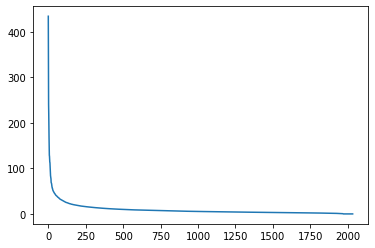

In [0]:
plt.plot(s);

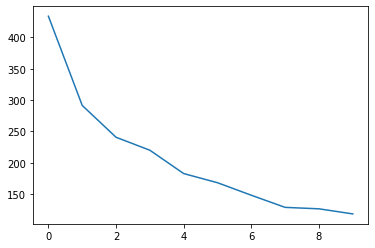

In [0]:
plt.plot(s[:10])


In [0]:
num_top_words=8

def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

In [0]:
show_topics(Vh[:10])


['ditto critus propagandist surname galacticentric kindergarten surreal imaginative',
 'jpeg gif file color quality image jfif format',
 'graphics edu pub mail 128 3d ray ftp',
 'jesus god matthew people atheists atheism does graphics',
 'image data processing analysis software available tools display',
 'god atheists atheism religious believe religion argument true',
 'space nasa lunar mars probe moon missions probes',
 'image probe surface lunar mars probes moon orbit',
 'argument fallacy conclusion example true ad argumentum premises',
 'space larson image theory universe physical nasa material']

In [0]:
num_top_topics=10

def show_doc(a):
    top_topics = lambda t: [i for i in np.argsort(t)[:-num_top_topics-1:-1]]
    top_topics_ = ([top_topics(t) for t in a])
    return top_topics_

In [0]:
def check_comments(num, list_set):
  i = 0
  comment_set = []
  for l in list_set:
    if (num in l):
      comment_set.append(i)
    i = i+1
  print(comment_set)
  return [newsgroups_train.data[k] for k in comment_set]



In [0]:
list_set = show_doc(U)
# print(list_set)

In [0]:
len(list_set[0])

10

In [0]:
cmnts = check_comments(9, list_set)

[131, 553, 916, 1433, 1527, 1708, 1733, 1875, 1904]


In [0]:
cmnts

['Archive-name: space/references\nLast-modified: $Date: 93/04/01 14:39:21 $\n\nREFERENCES ON SPECIFIC AREAS\n\n    PUBLISHERS OF SPACE/ASTRONOMY MATERIAL\n\n    Astronomical Society of the Pacific\n    1290 24th Avenue\n    San Francisco, CA 94122\n\n\tMore expensive but better organized slide sets.\n\n    Cambridge University Press\n    32 East 57th Street\n    New York, NY 10022\n\n    Crawford-Peters Aeronautica\n    P.O. Box 152528\n    San Diego, CA 92115\n    (619) 287-3933\n\n\tAn excellent source of all kinds of space publications. They publish\n\ta number of catalogs, including:\n\t    Aviation and Space, 1945-1962\n\t    Aviation and Space, 1962-1990\n\t    Space and Related Titles\n\n    European Southern Observatory\n    Information and Photographic Service\n    Dr R.M. West\n    Karl Scharzschild Strasse 2\n    D-8046 Garching bei Munchen\n    FRG\n\n\tSlide sets, posters, photographs, conference proceedings.\n\n    Finley Holiday Film Corporation\n    12607 East Philadelp

In [0]:
show_topics([Vh[4]])

['image data processing analysis software available tools display']